# Import keras

In [1]:
from keras import layers, models, optimizers, metrics, losses
from keras.datasets import mnist

Using TensorFlow backend.


# Load MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Visualize MNIST data

In [3]:
print("train_images.shape", train_images.shape)
print("image shape", train_images[0].shape)
print("train_labels.shape", train_labels.shape)
print("len(train_labels)", len(train_labels))

print("test_images.shape", test_images.shape)
print("image shape", test_images[0].shape)
print("test_labels.shape", test_labels.shape)
print("len(test_labels)", len(test_labels))

train_images.shape (60000, 28, 28)
image shape (28, 28)
train_labels.shape (60000,)
len(train_labels) 60000
test_images.shape (10000, 28, 28)
image shape (28, 28)
test_labels.shape (10000,)
len(test_labels) 10000


In [4]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

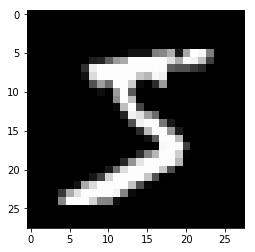

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray')
plt.show()

## Save datasets for further usages

In [7]:
ori_train_images = train_images.copy()
ori_train_labels = train_labels.copy()

ori_test_images = test_images.copy()
ori_test_labels = test_labels.copy()

# Train a digit recognizer
## Approach 01: Use fully connected neural network

### Design your fully connected neural network

In [9]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
net.add(layers.Dense(10, activation='softmax')) # 10 outputs for [0, 9]

net.compile(optimizer=optimizers.RMSprop(), 
            loss=losses.categorical_crossentropy,
            metrics=[metrics.categorical_accuracy])

### Format the image data and labels

In [10]:
train_images = train_images.reshape((60000, 28 * 28)) # Reshape an image to [1, 28 * 28]
train_images = train_images.astype("float32") / 255 # Scale to [0, 1]

test_images = test_images.reshape((10000, 28 * 28)) # Reshape an image to [1, 28 * 28]
test_images = test_images.astype("float32") / 255 # Scale to [0, 1]


In [11]:
from keras.utils import to_categorical

train_labels = to_categorical(ori_train_labels)
test_labels = to_categorical(ori_test_labels)

In [13]:
print("train_images.shape", train_images.shape)
print("image shape", train_images[0].shape)
print("train_labels.shape", train_labels.shape)
print("train_labels\n", train_labels)
print("train_labels[0]", train_labels[0])

train_images.shape (60000, 784)
image shape (784,)
train_labels.shape (60000, 10)
train_labels
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]
train_labels[0] [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [14]:
history = net.fit(train_images, 
                  train_labels, 
                  epochs=10,
                  batch_size=128,
                  validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.2583 - categorical_accuracy: 0.9256 - val_loss: 0.1379 - val_categorical_accuracy: 0.9605
Epoch 2/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.1056 - categorical_accuracy: 0.9685 - val_loss: 0.0869 - val_categorical_accuracy: 0.9742
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0694 - categorical_accuracy: 0.9795 - val_loss: 0.0868 - val_categorical_accuracy: 0.9727
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0496 - categorical_accuracy: 0.9848 - val_loss: 0.0756 - val_categorical_accuracy: 0.9774
Epoch 5/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0376 - categorical_accuracy: 0.9888 - val_loss: 0.0686 - val_categorical_accuracy: 0.9809
Epoch 6/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0286 - categor

### Visualize the accuracy & loss

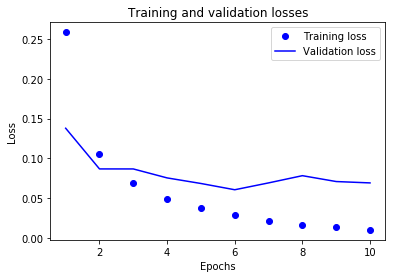

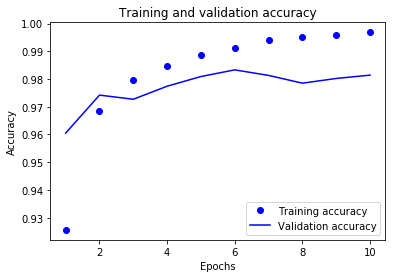

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history

train_acc = history_dict['categorical_accuracy']
train_loss = history_dict['loss']

val_acc = history_dict['val_categorical_accuracy']
val_loss = history_dict['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Use the latest model to evaluate the test data

In [16]:
results = net.evaluate(test_images, test_labels)
print(results)

10000/10000 [==============================] - 0s 46us/step
[0.069326155563952482, 0.98140000000000005]


### Use the latest model to predict the data without labels

In [17]:
import numpy as np
results = net.predict(test_images)

print("1st predict results: \n", results[0])
print("1st predict label: \n", np.argmax(results[0]))

1st predict results: 
 [  5.86234056e-12   1.68054200e-14   2.02051442e-08   3.41590135e-06
   1.82011219e-19   1.04215359e-10   8.09242749e-20   9.99996543e-01
   9.70138622e-11   5.15044931e-08]
1st predict label: 
 7
